# Knapsack formulation

FICO Xpress v9.0.0, Hyper, solve started 12:11:46, Jul 3, 2023
Heap usage: 401KB (peak 401KB, 113KB system)
Maximizing MILP noname using up to 8 threads and up to 63GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
         1 rows          100 cols          100 elements       100 entities
Presolved problem has:
         1 rows          100 cols          100 elements       100 entities
Presolve finished in 0 seconds
Heap usage: 445KB (peak 447KB, 113KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  9.90e+01] / [ 1.56e-02,  1.55e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  2.17e+03] / [ 1.00e+00,  3.38e+01]
  Objective      [min,max] : [ 1.00e+00,  9.90e+01] / [ 1.00e+00,  9.90e+01]
Autoscaling applied standard scaling

Will try to keep branch and bound tree memory usage below 60.7GB
 *** Solution found:      .000000   Time:   0.00    Heuristic: T ***
 *** Solution found:  2135.00

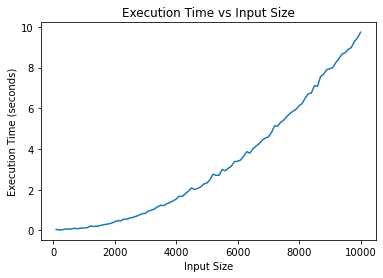

In [16]:
import xpress as xp
import random
import time
import matplotlib.pyplot as plt

def knapsack_problem(N):
    # Generate random weights and values for the items
    weights = [random.randint(1, 100) for _ in range(N)]
    values = [random.randint(1, 100) for _ in range(N)]
    capacity = random.randint(N * 10, N * 40)
    # Create the Xpress problem
    prob = xp.problem()

    # Create variables
    x = [xp.var(vartype=xp.binary) for _ in range(N)]  # Binary variables for item selection
    prob.addVariable(x)

    # Set the objective function
    prob.setObjective(sum(x[i] * values[i] for i in range(N)), sense=xp.maximize)

    # Add the weight constraint
    prob.addConstraint(sum(x[i] * weights[i] for i in range(N)) <= capacity)

    # Solve the problem
    prob.solve()

    # Get the solution
    solution = prob.getSolution(x)

    return solution

# Set the range of input sizes
min_size = 100
max_size = 10000
step = 100
# Lists to store input sizes and execution times
input_sizes = []
execution_times = []

# Perform the experiment
for N in range(min_size, max_size + 1, step):
    start_time = time.time()

    # Solve the knapsack problem
    solution = knapsack_problem(N)

    end_time = time.time()
    execution_time = end_time - start_time

    input_sizes.append(N)
    execution_times.append(execution_time)

# Plot the curve
plt.plot(input_sizes, execution_times)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Input Size')
plt.show()


# Fractional knapsack

FICO Xpress v9.0.0, Hyper, solve started 12:36:15, Jul 3, 2023
Heap usage: 401KB (peak 401KB, 287KB system)
Maximizing MILP noname using up to 8 threads and up to 63GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
         1 rows          100 cols          100 elements       100 entities
Presolved problem has:
         1 rows          100 cols          100 elements       100 entities
Presolve finished in 0 seconds
Heap usage: 445KB (peak 447KB, 287KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  9.70e+01] / [ 1.56e-02,  1.52e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  1.22e+03] / [ 1.00e+00,  1.91e+01]
  Objective      [min,max] : [ 2.00e+00,  1.00e+02] / [ 2.00e+00,  1.00e+02]
Autoscaling applied standard scaling

Will try to keep branch and bound tree memory usage below 60.7GB
 *** Solution found:      .000000   Time:   0.00    Heuristic: T ***
 *** Solution found:  1311.00

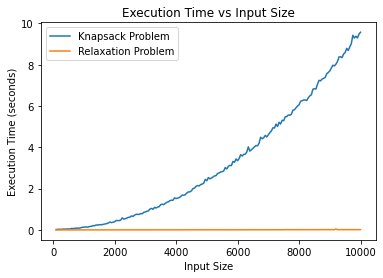

In [20]:
import xpress as xp
import random
import time
import matplotlib.pyplot as plt

def fractional_knapsack(weights, values, capacity):
    N = len(weights)
    items = [{'weight': weights[i], 'value': values[i]} for i in range(N)]

    # Calculate the value-to-weight ratio for each item
    for item in items:
        item['ratio'] = item['value'] / item['weight']

    # Sort the items based on the ratio in descending order
    items.sort(key=lambda x: x['ratio'], reverse=True)

    total_value = 0
    knapsack = []

    for item in items:
        if item['weight'] <= capacity:
            # Take the whole item
            knapsack.append(item)
            total_value += item['value']
            capacity -= item['weight']
        else:
            break

    return knapsack, total_value

def knapsack_problem(weights, values, capacity):
    # Generate random weights and values for the items
    N = len(weights)
    # Solve the fractional knapsack problem
    fractional_knapsack(weights, values, capacity)

    # Create the Xpress problem
    prob = xp.problem()

    # Create variables
    x = [xp.var(vartype=xp.binary) for _ in range(N)]  # Binary variables for item selection
    prob.addVariable(x)

    # Set the objective function
    prob.setObjective(sum(x[i] * values[i] for i in range(N)), sense=xp.maximize)

    # Add the weight constraint
    prob.addConstraint(sum(x[i] * weights[i] for i in range(N)) <= capacity)

    # Solve the problem
    prob.solve()

    # Get the solution
    solution = prob.getSolution(x)

    return solution

# Set the range of input sizes
min_size = 100
max_size = 10000
step = 50

# Lists to store input sizes and execution times
input_sizes = []
execution_times_knapsack = []
execution_times_relaxation = []

# Perform the experiment
for N in range(min_size, max_size + 1, step):
    weights = [random.randint(1, 100) for _ in range(N)]
    values = [random.randint(1, 100) for _ in range(N)]
    capacity = random.randint(N * 10, N * 40)

    start_time = time.time()

    # Solve the knapsack problem
    solution = knapsack_problem(weights, values, capacity)

    end_time = time.time()
    execution_time_knapsack = end_time - start_time

    start_time = time.time()

    # Solve the relaxation problem
    fractional_knapsack(weights, values, capacity)

    end_time = time.time()
    execution_time_relaxation = end_time - start_time

    input_sizes.append(N)
    execution_times_knapsack.append(execution_time_knapsack)
    execution_times_relaxation.append(execution_time_relaxation)

# Plot the curves
plt.plot(input_sizes, execution_times_knapsack, label='Knapsack Problem')
plt.plot(input_sizes, execution_times_relaxation, label='Relaxation Problem')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Input Size')
plt.legend()
plt.show()


In [81]:
! pip install pulp

# Runtime comparison

In [ ]:
import pulp
import matplotlib.pyplot as plt
import random
import time as tm


def measure_execution_time(func):
    def wrapper(*args, **kwargs):
        start_time = tm.time()
        result = func(*args, **kwargs)
        end_time = tm.time()
        execution_time = end_time - start_time
        return execution_time
    return wrapper

@measure_execution_time
def solve_knapsack_01(weights, values, capacity):
    # Create a binary variable for each item
    items = range(len(weights))
    x = pulp.LpVariable.dicts('x', items, cat='Binary')
    
    # Create the problem
    problem = pulp.LpProblem("Knapsack_01_Problem", pulp.LpMaximize)
    
    # Objective function: maximize total value
    problem += sum(values[i] * x[i] for i in items)
    
    # Constraint: total weight should not exceed capacity
    problem += sum(weights[i] * x[i] for i in items) <= capacity
    
    # Solve the problem
    problem.solve()


# Define the input sizes and generate random weights, values, and capacities
input_sizes = range(100,10000,250)
times = []
for size in input_sizes:
    weights = [random.randint(1, 100) for _ in range(size)]
    values = [random.randint(1, 100) for _ in range(size)]
    capacity = random.randint(size * 10, size * 20)
    t = solve_knapsack_01(weights,values,capacity)
    print(t)
    times.append(t)




In [ ]:
weights = [random.randint(1, 100) for _ in range(size)]
values = [random.randint(1, 100) for _ in range(size)]
capacity = random.randint(size * 10, size * 20)
t = solve_knapsack_01(weights,values,capacity)

In [ ]:
a = list(input_sizes)
a.pop()
times.pop()

# Curves (comparison)

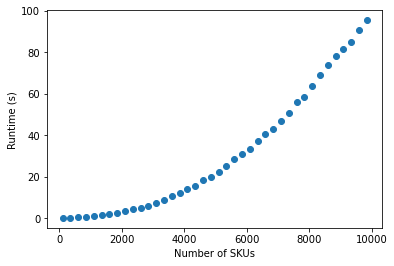

In [102]:
plt.scatter(a, times)
plt.xlabel("Number of SKUs")
plt.ylabel('Runtime (s)')
plt.show()


In [80]:
input_sizes = list(range(100,10000,500))
print(input_sizes)


[100, 600, 1100, 1600, 2100, 2600, 3100, 3600, 4100, 4600, 5100, 5600, 6100, 6600, 7100, 7600, 8100, 8600, 9100, 9600]


In [105]:
b = list(range(100,10000+1,50))

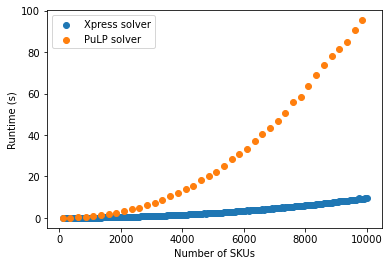

<Figure size 432x288 with 0 Axes>

In [108]:
plt.scatter(b,execution_times_knapsack,label="Xpress solver")
plt.scatter(a, times,label="PuLP solver")

plt.xlabel("Number of SKUs")
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()
plt.savefig('Downloads/XpressvsPuLP.jpeg')

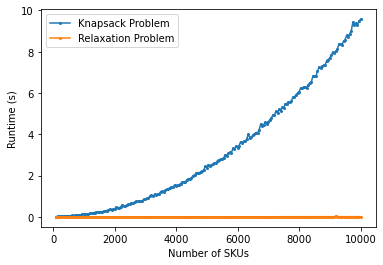

In [76]:
plt.plot(input_sizes, execution_times_knapsack, label='Knapsack Problem',marker='o',markersize=2)
plt.plot(input_sizes, execution_times_relaxation, label='Relaxation Problem',marker='o',markersize=2)
plt.xlabel('Number of SKUs')
plt.ylabel('Runtime (s)')
plt.legend()
plt.show()


In [1]:
import numpy as np
import xpress as xp
import time
import matplotlib.pyplot as plt

def generate_random_values(N):
    price = {i: 2 * np.random.randint(1, 101) for i in range(N)}
    demand = {i: np.random.randint(1, 16) for i in range(N)}
    alpha = np.random.rand(N, N)
    cost = {i: np.random.randint(1, 101) for i in range(N)}
    volumes = {i: np.random.randint(100, 1001) for i in range(N)}
    return price, demand, alpha, cost, volumes

def solve_problem(N):
    # Create the problem
    prob = xp.problem()

    # Decision variables
    n = N
    x = np.array([xp.var(vartype=xp.binary, name=f'x_{i}') for i in range(1, n + 1)])
    u = np.array([xp.var(vartype=xp.integer, lb=0, name=f'u_{i}') for i in range(1, n + 1)])
    z = np.array([[xp.var(vartype=xp.binary, name=f'z_{i}_{j}') for j in range(1, n + 1)] for i in range(1, n + 1)])

    prob.addVariable(x, u, z)

    # Parameters
    K_T = 10000
    d = np.array([np.random.randint(1, 16) for _ in range(n)])  # Random values for demand
    w = np.array([np.random.randint(100,1001) for i in range(n)])
    alpha = np.random.rand(n, n)  # Random values for alpha
    c = np.array([np.random.randint(1, 101) for _ in range(n)])  # Random values for cost
    p = 2 * c
    C = 1.2 * K_T * np.dot(w, d)  # Random values for C
    M = 1000000000
    delta = 0.7
        # Objective function
    prob.setObjective(xp.Sum(K_T * p[i] * d[i] * x[i] for i in range(n)) +xp.Sum(K_T * p[i] * xp.Sum(
    delta*alpha[j, i] * d[j] * (x[i] - z[i, j]) for j in range(n) if j != i)for i in range(n))
    - xp.Sum(c[i] * u[i] for i in range(n)),sense=xp.maximize)

    # Constraints
    prob.addConstraint(xp.Sum(w[i] * u[i] for i in range(n)) <= C)
    for i in range(n):
        prob.addConstraint(u[i] <= M * x[i])
        prob.addConstraint(
            u[i]>= K_T * d[i] * x[i]+ K_T*xp.Sum(delta*alpha[j, i] * d[j] * (x[i] - z[i, j]) for j in range(n) if j != i) )
        for j in range(n):
            if j != i:
                prob.addConstraint(z[i, j] <= x[i])
                prob.addConstraint(z[i, j] <= x[j])
                prob.addConstraint(z[i, j] >= x[i] + x[j] - 1)
                prob.addConstraint(z[j, i] == z[i, j]) 

    # Solve the problem
    prob.solve()

    # Print non-zero variable values as lists
    print("x:")
    for i in range(n):
        if prob.getSolution(x[i]) > 0:
            print(f"x_{i}: {prob.getSolution(x[i])}")

    print("u:")
    for i in range(n):
        if prob.getSolution(u[i]) > 0:
            print(f"u_{i}: {prob.getSolution(u[i])}")

    print("z:")
    for i in range(n):
        for j in range(n):
            if prob.getSolution(z[i][j]) > 0:
                print(f"z_{i}_{j}: {prob.getSolution(z[i][j])}")
    return prob.getObjVal()


# Set the input size
input_sizes = list(range(100,10000,1000))

# Store execution times for different input sizes
execution_times = []


    

In [12]:
N = 130
np.random.seed(0) 
start_time = time.time()
objective_value = solve_problem(N)
end_time = time.time()
execution_time = end_time - start_time
execution_times.append(execution_time)
print(f"Objective Value (N={N}): {objective_value}")
print("exec times",execution_times)

FICO Xpress v9.0.0, Hyper, solve started 17:15:27, Jul 6, 2023
Heap usage: 24MB (peak 24MB, 9741KB system)
Maximizing MILP noname using up to 8 threads and up to 63GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
     67341 rows        17160 cols       168350 elements     17160 entities
Presolved problem has:
     25416 rows         8645 cols        76115 elements      8645 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 32MB (peak 52MB, 9741KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 3.65e-01,  1.00e+09] / [ 1.74e-07,  1.93e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  5.73e+09] / [ 1.00e+00,  1.12e+07]
  Objective      [min,max] : [ 1.00e+00,  6.88e+08] / [ 1.00e+00,  6.88e+08]
Autoscaling applied standard scaling

Will try to keep branch and bound tree memory usage below 60.7GB
 *** Solution found:      .000000   Time:   0.73    Heuristic: T ***
Startin

In [4]:
execution_times

[223.39771437644958]